In [1]:
import numpy as np
import pandas as pd

In [13]:
data = pd.read_csv("~/Statistical-Learning/data/prostate_cancer.csv")

In [14]:
data.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [15]:
data = data.drop('Unnamed: 0', axis = 1)

In [17]:
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


# Correlations

In [18]:
corr = data.corr()

In [19]:
corr

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


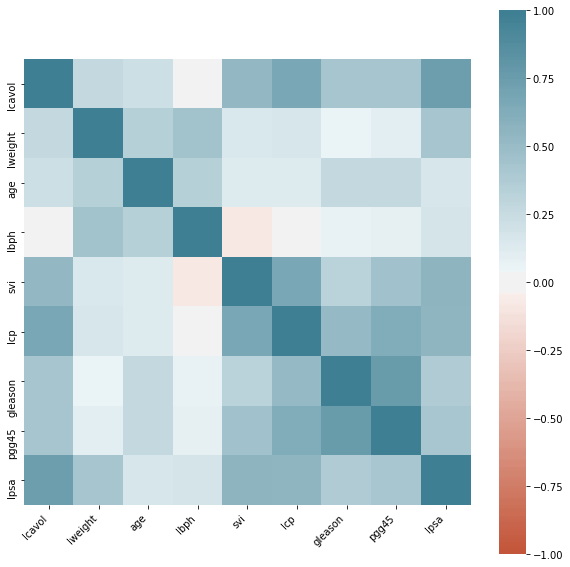

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax

Relatively strong correlations: <br>
*lcavol ~ lpsa* <br>
*lcavol ~ lcp* <br>
*gleason ~ pgg45*

# Pairwise Scatter Plot Matrix

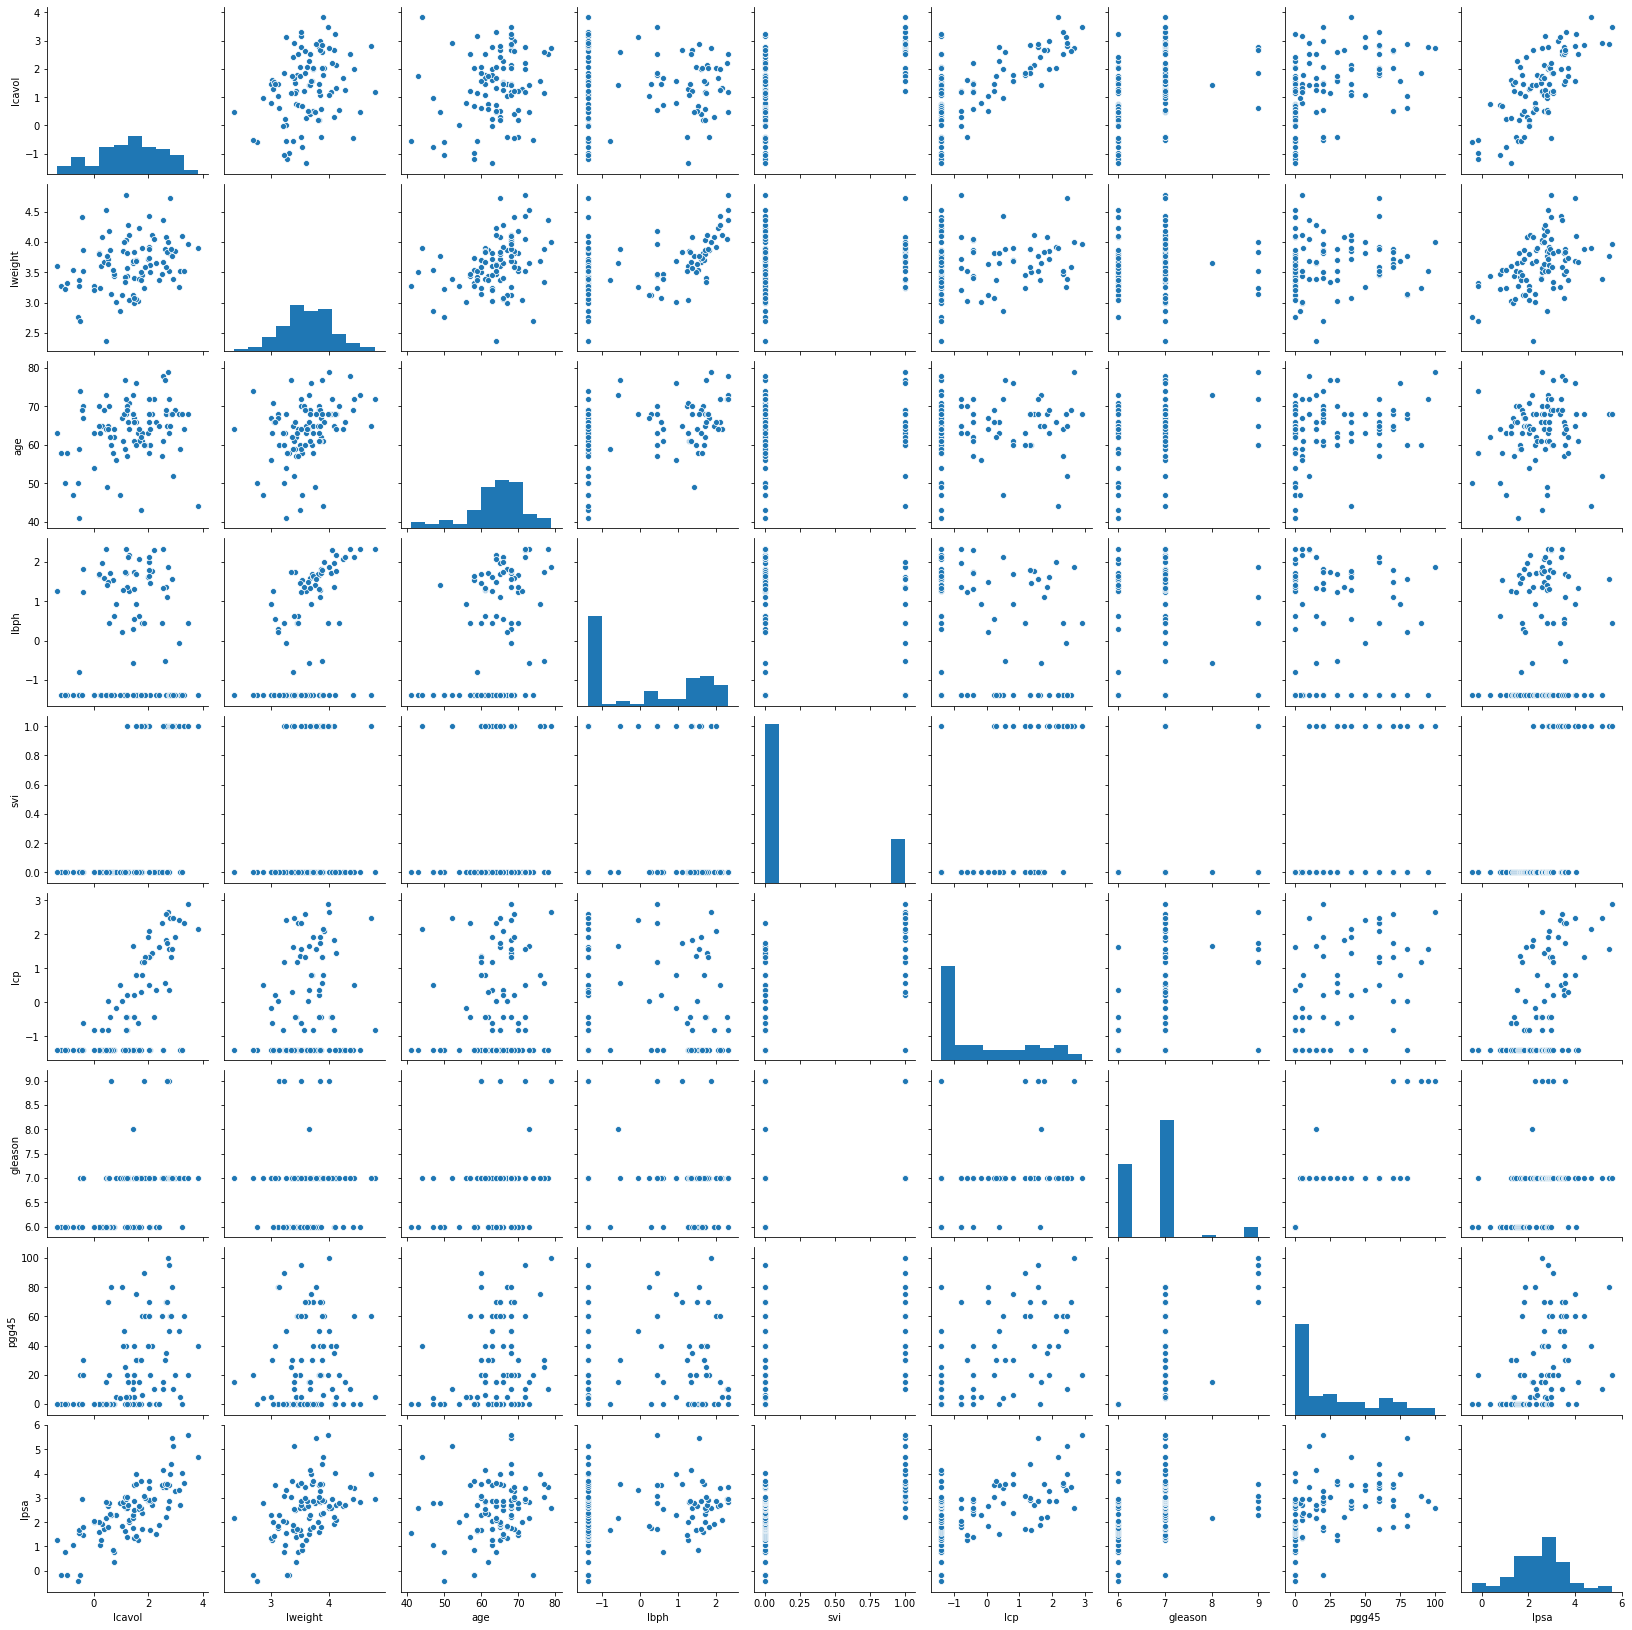

In [45]:
ax2 = sns.pairplot(data, diag_kind='hist')
ax2

Visually linear pairs: <br>
*lcavol ~ lcp* <br>
*lcavol ~ lpsa* <br>
*lweight ~ lpsa* <br>
*lcp ~ lpsa* <br>

# Linear Regression on *lpsa*

### Prepare Train, Test; X, Y

In [52]:
data_x = data.drop(['lpsa','train'], axis=1)

In [53]:
data_x_normalized = (data_x - data_x.mean())/data_x.std()

In [55]:
data_x_normalized.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01
mean,7.325183e-17,8.011919e-16,5.036063e-16,2.231892e-17,3.296332e-16,3.296332e-16,-3.319223e-17,-4.091801e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.288330e+00,-2.927180e+00,-3.071272e+00,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01
25%,-7.103074e-01,-5.907003e-01,-5.192637e-01,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01
50%,8.222243e-02,-1.385505e-02,1.523174e-01,1.376813e-01,-5.229409e-01,-4.427980e-01,3.426271e-01,-3.326277e-01
75%,6.592691e-01,5.776070e-01,5.552660e-01,1.004813e+00,-5.229409e-01,9.712290e-01,3.426271e-01,5.537703e-01
max,2.096506e+00,2.687699e+00,2.032744e+00,1.534282e+00,1.892548e+00,2.205279e+00,3.112196e+00,2.681126e+00


In [64]:
x_train = data_x_normalized[data.train=='T']
x_train.shape

(67, 8)

In [119]:
mat_x = np.hstack((np.ones((len(x_train.values), 1)), x_train.values))
mat_x.shape

(67, 9)

In [120]:
x_test = data_x_normalized[data.train=='F']
mat_x_test = np.hstack((np.ones((len(x_test.values), 1)), x_test.values))

In [65]:
y_train = data[data.train=='T'].lpsa
y_test = data[data.train=='F'].lpsa
y_train.shape

(67,)

### Fit OLS

In [121]:
mat_xt = np.transpose(mat_x)
# Solve (X^T*X)b = X^T*y for b
ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, y_train.values))

In [122]:
ols_beta

array([ 2.46493292,  0.67952814,  0.26305307, -0.14146483,  0.21014656,
        0.3052006 , -0.28849277, -0.02130504,  0.26695576])

In [124]:
y_train_ols = np.matmul(mat_x, ols_beta)

In [154]:
variance = sum((y_train - y_train_ols)**2)/(x_train.shape[0] - x_train.shape[1] - 1)

In [155]:
std = variance**0.5
std

0.7122860775034966

In [156]:
xTx_inv_diag = np.diag(np.linalg.inv(np.matmul(mat_xt, mat_x)))

In [157]:
xTx_inv_diag

array([0.01572315, 0.03160513, 0.0180245 , 0.02024295, 0.02059466,
       0.03011133, 0.04706662, 0.04158214, 0.04651042])

In [158]:
beta_std = std * (xTx_inv_diag**0.5)

In [159]:
beta_std

array([0.08931498, 0.12662903, 0.09562821, 0.10134245, 0.10221904,
       0.12360027, 0.15452934, 0.14524723, 0.15361357])

In [160]:
z_score = ols_beta / beta_std

In [161]:
z_score

array([27.59820312,  5.36629046,  2.75078939, -1.39590898,  2.05584563,
        2.46925518, -1.86691264, -0.14668121,  1.73783972])

In [162]:
terms = ['Intercept'] + list(data_x.columns)

In [163]:
ols_result = {'Term':terms, 'Coefficient':ols_beta, 'Std.Error':beta_std, 'Z Score':z_score}
ols_result = pd.DataFrame(ols_result)

In [164]:
ols_result

,Term,Coefficient,Std.Error,Z Score
0,Intercept,2.464933,0.089315,27.598203
1,lcavol,0.679528,0.126629,5.366290
2,lweight,0.263053,0.095628,2.750789
3,age,-0.141465,0.101342,-1.395909
4,lbph,0.210147,0.102219,2.055846
5,svi,0.305201,0.123600,2.469255
6,lcp,-0.288493,0.154529,-1.866913
7,gleason,-0.021305,0.145247,-0.146681
8,pgg45,0.266956,0.153614,1.737840


A Z-score greater than 2 in absolute value is approximately significant at the 5% level. (For our example, we have nine parameters, and the 0.025 tail quantiles of the t67−9 distribution are ±2.002!)

### F test

Dropping all the non-significant variables: age, lcp, gleason and pgg45

In [182]:
import scipy

In [176]:
p1 = 8
p0 = 8 - 4

In [167]:
rss1 = sum((y_train_ols - y_train)**2)
rss1

29.426384459908398

In [169]:
x_train_f0 = x_train.drop(['age','lcp','gleason','pgg45'], axis=1)

In [171]:
mat_x_f0 = np.hstack((np.ones((len(x_train_f0.values), 1)), x_train_f0.values))
mat_x_f0.shape

(67, 5)

In [172]:
mat_xt_f0 = np.transpose(mat_x_f0)
# Solve (X^T*X)b = X^T*y for b
ols_beta_f0 = np.linalg.solve(np.matmul(mat_xt_f0, mat_x_f0), np.matmul(mat_xt_f0, y_train.values))

In [173]:
y_train_ols_f0 = np.matmul(mat_x_f0, ols_beta_f0)

In [174]:
rss0 = sum((y_train_ols_f0 - y_train)**2)
rss0

32.81499474881555

In [181]:
f_score = ((rss0 - rss1)/(p1 - p0)) / (rss1/(x_train.shape[0] - p1 - 1))
f_score

1.6697548846375219

In [186]:
f_cdf = scipy.stats.f.cdf(f_score,
                          dfn=p1-p0,
                          dfd=x_train.shape[0]-p1-1)
p_value = 1-f_cdf
p_value

0.16933707265225173

The *p-value* for the F test is: Pr(F(4,58) > 1.67) = 0.17, hence is not significant.

The null hypothesis that betas for those removed column = 0 should be refused -> those columns should not be removed.

### Prediction Error

In [187]:
y_test_ols = np.matmul(mat_x_test, ols_beta)

In [191]:
mpe = np.mean((y_test - y_test_ols)**2)
mpe

0.5212740055076003

In [193]:
y_test_mean_prediction = np.mean(y_train)
base_error = np.mean((y_test - y_test_mean_prediction)**2)
base_error

1.0567332280603818

The mean prediction error on the test data is 0.521. In contrast, prediction using the mean training value of lpsa has a test error of 1.057, which is called the “base error rate.” Hence the linear model reduces the base error rate by about 50%.